In [73]:
#data analysis and wrangling
import pandas as pd
import numpy as np 
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

In [74]:
df = pd.read_csv('milk_processed.csv')
df.pop("Unnamed: 0")
df.pop("Date")
df.pop("Time")
df.pop("Hour")
df.pop("Mins")
df.pop("Secs")
df.pop("Year")
df.pop("Month")
df.pop("Day")
df.pop("entry_id")
df.pop("E1")
df.pop("M1")
df.pop("H1")
df.pop("T1")
df.pop("E2")
df.pop("M2")
df.pop("H2")
df.pop("T2")
df.tail()


,Ethanol,humidity,methane,temperature,Spoiled
4335,360,84.0,300.0,30.3,Yes
4336,350,84.0,302.0,30.2,Yes
4337,347,84.0,297.0,30.1,Yes
4338,346,84.0,296.0,30.2,Yes
4339,335,84.0,296.0,30.2,Yes


In [75]:
df = df.dropna()
df


,Ethanol,humidity,methane,temperature,Spoiled
0,153,71.0,206.0,31.7,No
1,145,71.0,199.0,31.8,No
2,142,71.0,198.0,31.8,No
3,143,70.0,199.0,31.8,No
4,143,70.0,203.0,31.9,No
...,...,...,...,...,...
4335,360,84.0,300.0,30.3,Yes
4336,350,84.0,302.0,30.2,Yes
4337,347,84.0,297.0,30.1,Yes
4338,346,84.0,296.0,30.2,Yes


In [76]:
df.Spoiled = df.Spoiled.map(dict(Yes=1, No=0))
df['Spoiled'] = df['Spoiled'].astype(int)
df['methane'] = df['methane'].astype(int)
df.dtypes

Ethanol          int64
humidity       float64
methane          int32
temperature    float64
Spoiled          int32
dtype: object

In [77]:
data = df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# define model
model = KNeighborsClassifier(n_neighbors=10)
# fit model
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

(4340, 4) (4340,)
(3038, 4) (1302, 4) (3038,) (1302,)
Accuracy: 97.389


In [78]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[1096,   21],
       [  13,  172]], dtype=int64)

Text(42.0, 0.5, 'Truth')

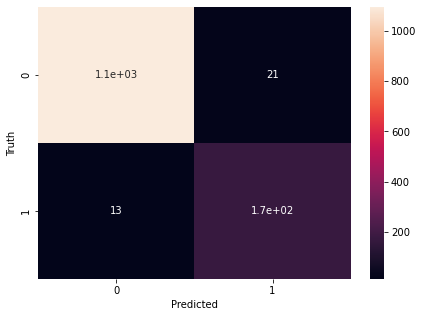

In [79]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [84]:
data2 = df.loc[500:4000:10]
data2


,Ethanol,humidity,methane,temperature,Spoiled
500,139,79.0,192,33.2,0
510,139,79.0,192,33.2,0
520,140,79.0,194,33.2,0
530,141,79.0,198,33.2,0
540,150,80.0,193,33.3,0
...,...,...,...,...,...
3960,308,89.0,294,33.2,0
3970,307,89.0,294,33.2,0
3980,308,89.0,294,33.2,0
3990,308,89.0,294,33.2,0


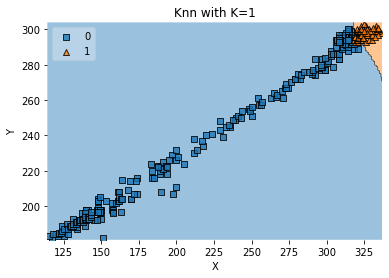

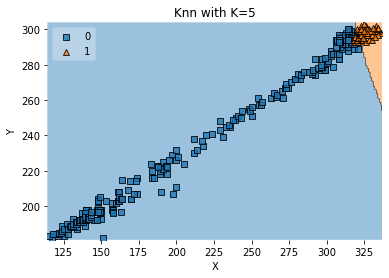

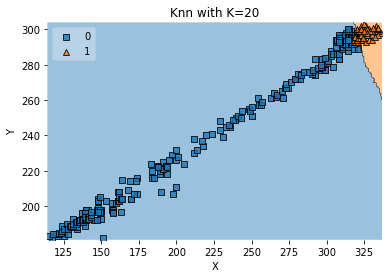

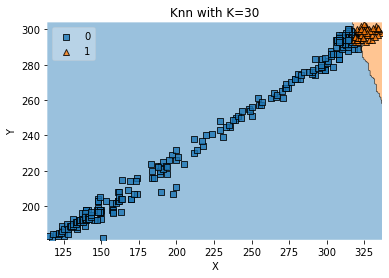

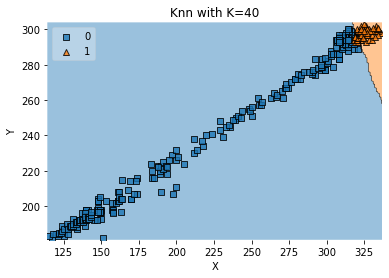

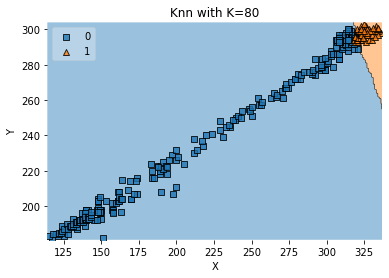

In [92]:
from sklearn import datasets, neighbors


def knn_comparison(data, k):
    x = data[['Ethanol','methane']].values
    y = data['Spoiled'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)# Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()

data1 = data2
for i in [1,5,20,30,40,80]:
    knn_comparison(data1, i)    